In [3]:
from aoc2023 import day1
from aoc2023 import maps
import numpy as np
import functools

In [4]:
data = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
"""

In [56]:
# data = day1.read_data_string("input.txt")
# data = day1.read_data_string("input_sample.txt")
lines = day1.split_data(data) 
paragraphs = [day1.split_data_p(paragraph) for paragraph in day1.split_data_paragraphs(data)]

In [57]:
total_tunnel_lenght = {
    "U": 0, 
    "D": 0, 
    "L": 0, 
    "R": 0, 
}
total_tunnel_lenght = {
    0: "R", 
    1: "D", 
    2: "L", 
    3: "U", 
}
for line in lines: 
    len_tunnel = int(line.split(" ")[1])
    dir_tunnel = line.split(" ")[0]
    total_tunnel_lenght[dir_tunnel] += len_tunnel

In [58]:
total_tunnel_lenght

{'U': 995, 'D': 995, 'L': 999, 'R': 999}

In [67]:
map_lava = np.zeros((2000,2000))
map_borders = np.zeros((2000,2000))

In [68]:
directions_lava = {
    "R": (0,1),
    "L": (0,-1),
    "D": (1,0),
    "U": (-1,0)
}

In [69]:
def sum_tuples(t1, t2):
    return tuple(a+b for a, b in zip(t1, t2))

In [70]:
square = (1000,1000)
for line in lines: 
    len_tunnel = int(line.split(" ")[1])
    dir_tunnel = line.split(" ")[0]
    for i in range(len_tunnel): 
        map_lava[square] = 1
        if dir_tunnel == "U": 
            map_borders[square] = 1
        square = sum_tuples(square, directions_lava[dir_tunnel])

        if dir_tunnel == "D": 
            map_borders[square] = -1

    total_tunnel_lenght[dir_tunnel] += len_tunnel

In [75]:
row_start = 600
row_end = 1100
col_start = 700
col_end = 1300

submatrix_lava = map_lava[row_start:row_end, col_start:col_end]
submatrix_borders = map_borders[row_start:row_end, col_start:col_end]

In [71]:
map_borders

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
for i in range(submatrix_lava.shape[0]):
    for j in range(submatrix_lava.shape[1]): 
        if (submatrix_lava[(i,j)] == 0): 
            if sum(submatrix_borders[i, :j]) > 0: 
                submatrix_lava[(i,j)] = 1

In [80]:
sum(sum(submatrix_lava))

66993.0

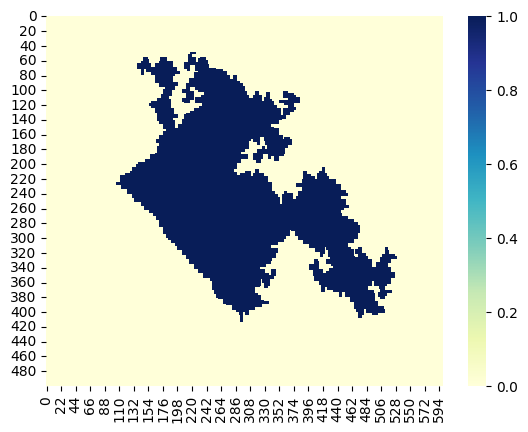

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
sns.heatmap(submatrix_lava, cmap="YlGnBu")

# Show the plot
plt.show()

In [82]:
total_tunnel_lenght = {
    "U": 0, 
    "D": 0, 
    "L": 0, 
    "R": 0, 
}
hex_to_dir = {
    0: "R", 
    1: "D", 
    2: "L", 
    3: "U", 
}
for line in lines: 
    hex_code = line.split(" ")[-1].replace("(", "").replace(")", "").replace("#", "")
    
    hex_code_dist = hex_code[:-1]
    hex_code_dir = hex_code[-1]

    len_tunnel = int(hex_code_dist, 16)
    dir_tunnel = hex_to_dir[int(hex_code_dir)]
    total_tunnel_lenght[dir_tunnel] += len_tunnel

In [83]:
total_tunnel_lenght

{'U': 60156403, 'D': 60156403, 'L': 58393377, 'R': 58393377}

In [84]:
a, x, y = 0, 1, 1
for l in lines:
    i = l.split()[ -1 ]
    d, h = int( i[ 2 : -2 ], 16 ), int( i[ -2 ] )
    nx = x + [ 1, 0, -1, 0 ][ h ] * d
    ny = y + [ 0, 1, 0, -1 ][ h ] * d
    a += x * ny - nx * y + abs( nx - x ) + abs( ny - y )
    x, y = nx, ny
print( a // 2 + 1 )

177243763226648
